In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('grayscale')

In [85]:
def euler_forward(f, y0: float, t0: float, fim: float, h: float) -> tuple[np.ndarray, np.ndarray]:
    t = np.arange(t0, fim + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(1, len(t)):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])

    return t, y


def euler_backward(f, y0: float, t0: float, fim: float, h: float) -> tuple[np.ndarray, np.ndarray]:
    t = np.arange(t0, fim + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(1, len(t)):
        def implicit_function(ynp1):
            return y[i-1] + h * f(t[i], ynp1) - ynp1
        sol = root(implicit_function, y[i-1])
        y[i] = sol.x[0]

    return t, y

In [86]:
# Teste Foreward para:
# dx/dy = y
# e y(0) = 1
# Funções
def f(t, y) -> np.ndarray:
    return y

def resposta(t: float) -> np.ndarray:
    return np.exp(t)

def erro_relativo(y_real: float, y_num: float) -> np.ndarray:
    return np.abs((y_real - y_num) / y_real)

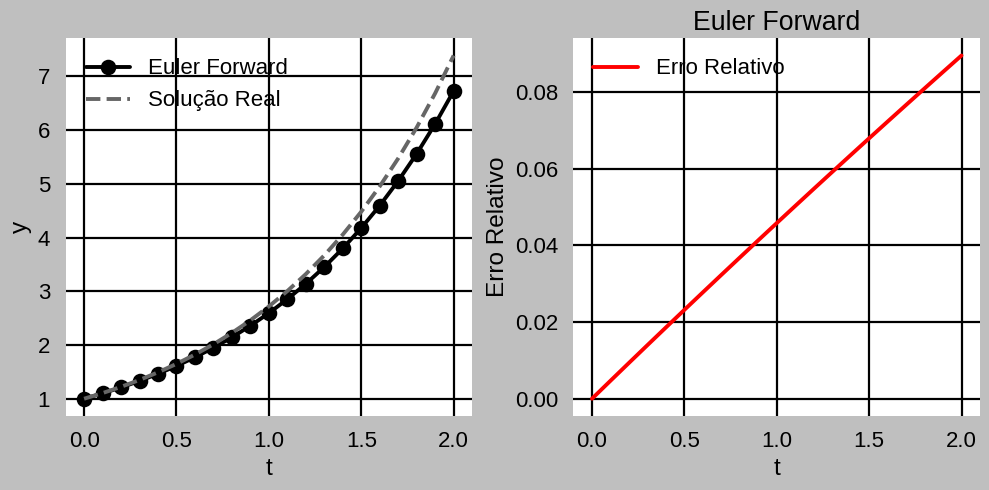

In [87]:
# Teste Foreward para:
# dx/dy = y
# e y(0) = 1
# Condições iniciais
y0 = 1
t0 = 0
t_end = 2
h = 0.1


t, y = euler_forward(f, y0, t0, t_end, h)
y_real = resposta(t)
erro = erro_relativo(y_real, y)



fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.title('Euler Forward')
axs[0].plot(t, y, label='Euler Forward', marker='o')
axs[0].plot(t, y_real, label='Solução Real', linestyle='--')
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, erro, label='Erro Relativo', color='red')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Erro Relativo')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


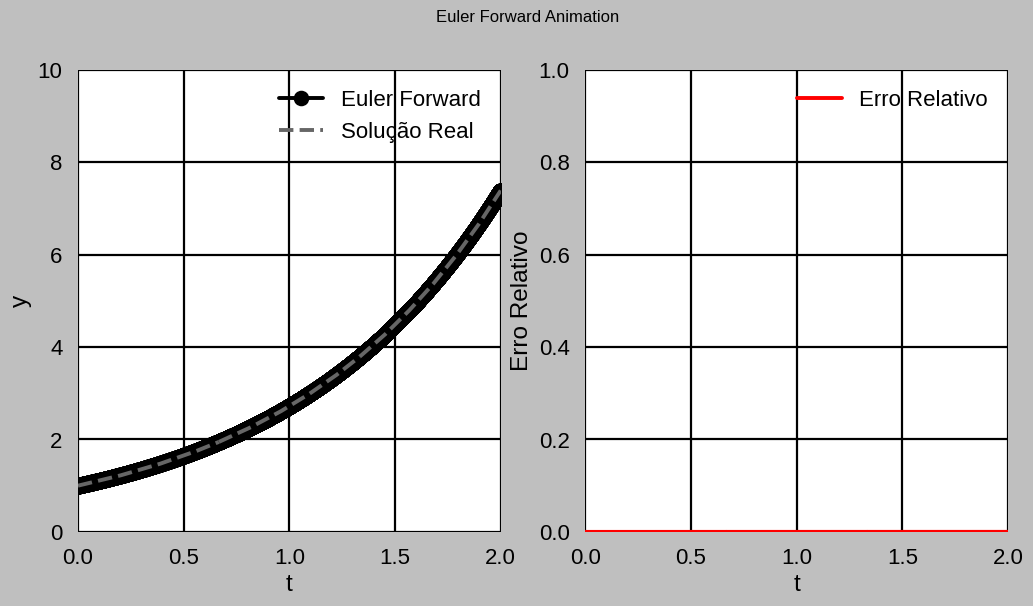

In [88]:
# Animação do Foreward para redução do h:
# dx/dy = y
# e y(0) = 1
y0 = 1
t0 = 0
t_end = 2
hs = np.logspace(-1, -4, num=50)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Euler Forward Animation')

line1, = axs[0].plot([], [], label='Euler Forward', marker='o')
line2, = axs[0].plot([], [], label='Solução Real', linestyle='--')
axs[0].set_xlim(t0, t_end)
axs[0].set_ylim(0, 10)
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

line3, = axs[1].plot([], [], label='Erro Relativo', color='red')
axs[1].set_xlim(t0, t_end)
axs[1].set_ylim(0, 1)
axs[1].set_xlabel('t')
axs[1].set_ylabel('Erro Relativo')
axs[1].legend()
axs[1].grid(True)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

def update(frame):
    h = frame
    t, y = euler_forward(f, y0, t0, t_end, h)
    y_real = resposta(t)
    erro = erro_relativo(y_real, y)

    line1.set_data(t, y)
    line2.set_data(t, y_real)
    line3.set_data(t, erro)

    return line1, line2, line3

interval_ms = 4000 / len(hs)
ani = FuncAnimation(fig, update, frames=hs, init_func=init, blit=True, interval=interval_ms, repeat=True)

# Gerei uma animação pra mostrar o erro indo pra 0 se o h for para 0.Pra mim a animação só rodou com essa função HTML
HTML(ani.to_html5_video())

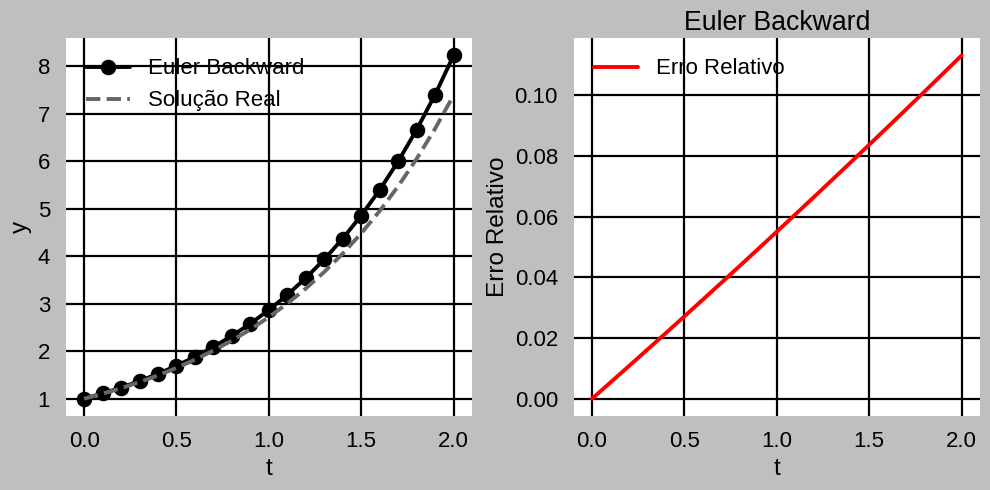

In [89]:
# Teste Backward para:
# dx/dy = y
# e y(0) = 1
y0 = 1
t0 = 0
t_end = 2
h = 0.1


t, y = euler_backward(f, y0, t0, t_end, h)
y_real = resposta(t)
erro = erro_relativo(y_real, y) # O erro é maior que o foreward



fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.title('Euler Backward')
axs[0].plot(t, y, label='Euler Backward', marker='o')
axs[0].plot(t, y_real, label='Solução Real', linestyle='--')
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, erro, label='Erro Relativo', color='red')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Erro Relativo')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


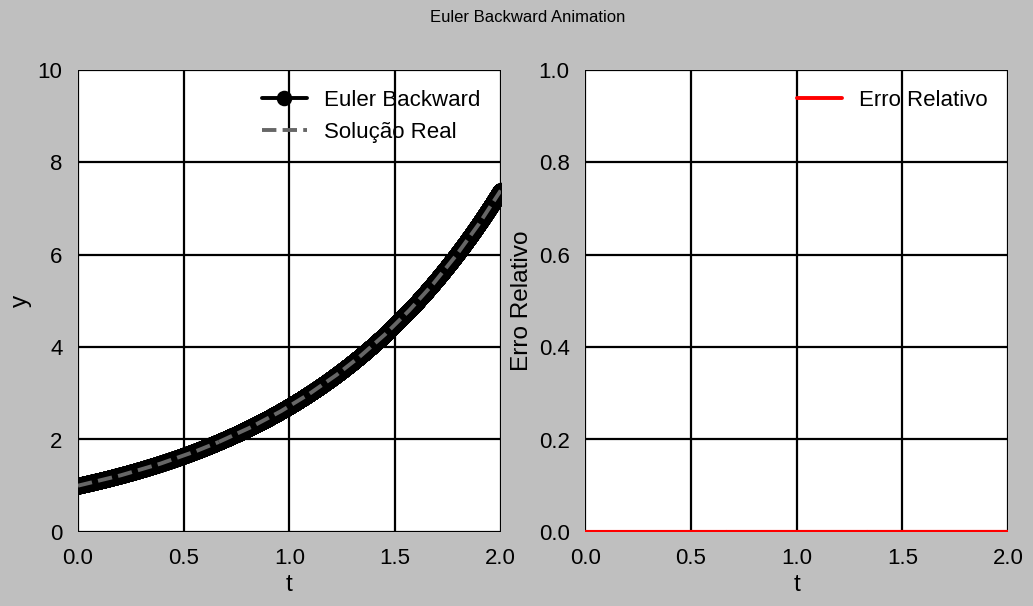

In [90]:
# Animação do Backward para redução do h:
# dx/dy = y
# e y(0) = 1
y0 = 1
t0 = 0
t_end = 2
hs = np.logspace(-1, -4, num=50)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Euler Backward Animation')

line1, = axs[0].plot([], [], label='Euler Backward', marker='o')
line2, = axs[0].plot([], [], label='Solução Real', linestyle='--')
axs[0].set_xlim(t0, t_end)
axs[0].set_ylim(0, 10)
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

line3, = axs[1].plot([], [], label='Erro Relativo', color='red')
axs[1].set_xlim(t0, t_end)
axs[1].set_ylim(0, 1)
axs[1].set_xlabel('t')
axs[1].set_ylabel('Erro Relativo')
axs[1].legend()
axs[1].grid(True)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

def update(frame):
    h = frame
    t, y = euler_backward(f, y0, t0, t_end, h)
    y_real = resposta(t)
    erro = erro_relativo(y_real, y)

    line1.set_data(t, y)
    line2.set_data(t, y_real)
    line3.set_data(t, erro)

    return line1, line2, line3

interval_ms = 4000 / len(hs)
ani = FuncAnimation(fig, update, frames=hs, init_func=init, blit=True, interval=interval_ms, repeat=True)

# Gerei uma animação pra mostrar o erro indo pra 0 se o h for para 0.Pra mim a animação só rodou com essa função HTML
HTML(ani.to_html5_video())